<a href="https://colab.research.google.com/github/novianaramadhani/A1_006_Postest2DataMing_Noviana-Ramadhani/blob/main/A1_006_Postest2Noviana_Ramadhani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_excel("market_basket2.xlsx",sheet_name="Sheet1")
# Untuk baca Dataset_Temp - sheet 1

In [ ]:
df

,whole milk,pastry,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetable,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 1 Item set
df.sum()

whole milk             5
pastry                 1
salty snack            1
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegetables     1
canned beer            1
misc beverages         1
hygiene articles       1
rolls/buns             3
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetbles        1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetable         1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

##Menampilkan item didalam dataset


In [ ]:
#Mengecek Item nya terdapat apa saja
df.columns

Index(['whole milk', 'pastry', 'salty snack', 'sausage ',
       'semi-finished bread', 'yogurt', 'soda', 'pickled vegetables',
       'canned beer', 'misc beverages', 'hygiene articles', 'rolls/buns',
       'frankfurter', 'whipped/sour cream', 'curd', 'beef', 'white bread',
       'butter', 'frozen vegetables', 'other vegetbles', 'tropical fruit',
       'sugar', 'butter milk', 'specialty chocolate', 'frozen meals',
       'dental care', 'root vegetable', 'detergent', 'dish cleaner',
       'cling film/bags'],
      dtype='object')

##Menemukan kombinasi barang yang terjadi


In [ ]:
# 2 Item set
from itertools import permutations #Library untuk buat kombinasi barang
# Extract unique items.
rules = list(permutations(df.columns, 2))
rules

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage '),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegetables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetbles'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetable'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('pa

In [ ]:
# Filter yang ada item kombinasi yang muncul aja yang dihitung
rule_baru = []
for rule in rules:
  # Memfilter dengan nama kolom
  if len(df[(df[rule[0]]==1) & (df[rule[1]]==1)]) >0:
    rule_baru.append(rule)
rule_baru

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage '),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pastry'),
 ('sausage ', 'whole milk'),
 ('sausage ', 'semi-finished bread'),
 ('sausage ', 'yogurt'),
 ('sausage ', 'hygiene articles'),
 ('sausage ', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage '),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage '),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegetables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegetables', 'soda'),
 ('canned beer', 'misc beverages'),
 ('misc beverages', 'canned beer'),
 ('hygiene articles', 'sausage '),
 ('rolls/buns', 'whole milk'),
 

In [ ]:
hitung = {} #Ganti dictionary # Menyimpan data dalam bentuk dictionary
for rule in rule_baru: # Perulangan membaca data pada dataset
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1) # Menentukan berapa jumlah kemunculan kombinasi dan menyimpannya dalam sebuah variabel
      ])
  hitung[str(rule)] = banyak_data # Menambahkan hasil penentuan ke dalam dictionary

hitung# Menampilkan hasil

{"('whole milk', 'pastry')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage ')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pastry', 'whole milk')": 1,
 "('pastry', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pastry')": 1,
 "('sausage ', 'whole milk')": 2,
 "('sausage ', 'semi-finished bread')": 1,
 "('sausage ', 'yogurt')": 1,
 "('sausage ', 'hygiene articles')": 1,
 "('sausage ', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage ')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage ')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegetables')": 1,
 "('soda', 'frankfurter')": 1,
 "('soda', 'whipped/sour cream')": 1,
 "('pickled vegetables', 'soda')": 1,

##Menghitung Support

In [ ]:
for item,ab in hitung.items():# Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
  print(f"{item} support = {ab/len(df)*100}%")

('whole milk', 'pastry') support = 5.263157894736842%
('whole milk', 'salty snack') support = 5.263157894736842%
('whole milk', 'sausage ') support = 10.526315789473683%
('whole milk', 'semi-finished bread') support = 5.263157894736842%
('whole milk', 'yogurt') support = 5.263157894736842%
('whole milk', 'soda') support = 5.263157894736842%
('whole milk', 'rolls/buns') support = 5.263157894736842%
('whole milk', 'butter') support = 5.263157894736842%
('pastry', 'whole milk') support = 5.263157894736842%
('pastry', 'salty snack') support = 5.263157894736842%
('salty snack', 'whole milk') support = 5.263157894736842%
('salty snack', 'pastry') support = 5.263157894736842%
('sausage ', 'whole milk') support = 10.526315789473683%
('sausage ', 'semi-finished bread') support = 5.263157894736842%
('sausage ', 'yogurt') support = 5.263157894736842%
('sausage ', 'hygiene articles') support = 5.263157894736842%
('sausage ', 'rolls/buns') support = 10.526315789473683%
('semi-finished bread', 'whol

In [ ]:
# Melihat banyak transaksi
len(df)

19

##Menghitung Confidence

In [ ]:
# List Confidens
# print([ab/df[kolom[0]].sum()*100 for ab,kolom in zip(hitung,rules)])

print("---")
for item,ab in hitung.items(): # Untuk melakukan perulangan pembacaan dataset pada tiap - tiap kombinasi itemnya
  #"A->B"
  i = eval(item) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%")

---
whole milk->pastry  Confidence = 20.0%
whole milk->salty snack  Confidence = 20.0%
whole milk->sausage   Confidence = 40.0%
whole milk->semi-finished bread  Confidence = 20.0%
whole milk->yogurt  Confidence = 20.0%
whole milk->soda  Confidence = 20.0%
whole milk->rolls/buns  Confidence = 20.0%
whole milk->butter  Confidence = 20.0%
pastry->whole milk  Confidence = 100.0%
pastry->salty snack  Confidence = 100.0%
salty snack->whole milk  Confidence = 100.0%
salty snack->pastry  Confidence = 100.0%
sausage ->whole milk  Confidence = 50.0%
sausage ->semi-finished bread  Confidence = 25.0%
sausage ->yogurt  Confidence = 25.0%
sausage ->hygiene articles  Confidence = 25.0%
sausage ->rolls/buns  Confidence = 50.0%
semi-finished bread->whole milk  Confidence = 100.0%
semi-finished bread->sausage   Confidence = 100.0%
semi-finished bread->yogurt  Confidence = 100.0%
yogurt->whole milk  Confidence = 100.0%
yogurt->sausage   Confidence = 100.0%
yogurt->semi-finished bread  Confidence = 100.0%

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

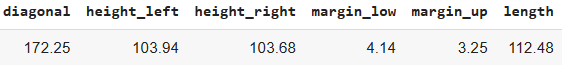
<!-- 1412 -->

In [ ]:
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics.pairwise import euclidean_distances
# import numpy as np

In [ ]:
df = pd.read_csv("deteksi_uang_palsu.csv")
# Untuk baca Dataset_Temp - sheet 1

In [ ]:
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


##Membuat tabel jarak

In [ ]:
# import library numpy
import numpy as np

# membuat dataframe dari data baru
new_data = pd.DataFrame({'diagonal': [172.25],
                         'height_left': [103.94],
                         'height_right': [103.68],
                         'margin_low': [4.14],
                         'margin_up': [3.25],
                         'length': [112.48]})

# Menghitung jarak antara setiap baris dataframe utama dengan dataframe data baru
df['distance'] = np.sqrt(
    (df['diagonal'] - new_data['diagonal'].values[0])**2
    + (df['height_left'] - new_data['height_left'].values[0])**2
    + (df['height_right'] - new_data['height_right'].values[0])**2
    + (df['margin_low'] - new_data['margin_low'].values[0])**2
    + (df['margin_up'] - new_data['margin_up'].values[0])**2
    + (df['length'] - new_data['length'].values[0])**2
)

# Menampilkan tabel jarak
print('Tabel Jarak : ')
print(df['distance'])

Tabel Jarak : 
0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: distance, dtype: float64


##Menambahkan kolom jarak

In [ ]:
# setting pandas agar bisa menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)

# Mengatur lebar tabel menjadi 200
pd.set_option('display.width', 200)

print(df)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
1        True    171.66       103.68        103.41        4.35       3.33  113.74  1.458321
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934
4        True    171.79       104.57        104.04        4.26       3.15  113.46  1.312593
5       False    172.00       104.23        104.52        5.76       3.37  110.94  2.421281
6       False    171.56       104.03        103.93        5.47       3.50  111.67  1.741896
7       False    171.90       104.33        104.40        4.70       3.31  112.12  1.113463
8       False    171.84       104.06        104.10        4.87       3.25  111.04  1.722034
9       False    172.11       104.14        104.15        4.84       3.28  110.9

##Mengurutkan data dari kecil ke terbesar

In [ ]:
# Mengurutkan data dari kecil ke besar
sorted_data = df.sort_values('distance')

# Menentukan nilai k
k = int(np.sqrt(len(df)))

# Menentukan data terdekat
data_terdekat = sorted_data.head(k)

# Menampilkan data terdekat
print(data_terdekat)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


##3. Menentukan hasil prediksi berdasarkan label terbanyak

In [ ]:
print("Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True \n")

# Mengimpor library sklearn untuk menggunakan algoritma knn
from sklearn.neighbors import KNeighborsClassifier

# Split data menjadi data training dan data testing
X_train = df.drop(columns=['is_genuine','distance'],axis=1)
y_train = df['is_genuine']

# inisiasi data baru menjadi data tes
test_data = new_data

# membuat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

# melatih knn dengan data training
knn.fit(X_train, y_train)

# memprediksi hasil
prediksi = knn.predict(test_data)
print("Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : "+ ' '.join(map(str, prediksi)))

Berdasarkan jawaban nomor 2, maka hasil prediksinya adalah : True 

Berdasarkan penggunaan library sklearn untuk memprediksi menggunakan Algoritma KNN, hasilnya adalah : True


# (3) Analisis

> Nama : Noviana Ramadhani

> Nim : 2109116006


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

###Business Understanding


Business understanding pada bidang retail adalah pemahaman menyeluruh tentang industri retail dan strategi bisnis yang dibutuhkan untuk mengelola bisnis retail yang sukses. Ini melibatkan pemahaman tentang berbagai aspek bisnis seperti pasar, pelanggan, persaingan, produk, strategi pemasaran, keuangan, dan operasi.

Tujuan Dalam bisnis ritel, pemahaman pasar sangat penting. Hal ini mencakup pemahaman tentang tren pasar, perilaku konsumen, preferensi, dan kebutuhan mereka. Ini membantu para pemilik bisnis untuk mengembangkan produk dan layanan yang menarik bagi konsumen dan juga mengembangkan strategi pemasaran yang efektif untuk mencapai target pasar mereka.


Selain itu, pemahaman tentang persaingan juga penting dalam bisnis retail. Ini melibatkan pemahaman tentang siapa pesaing di pasar dan bagaimana mereka mengoperasikan bisnis mereka. Dengan memahami persaingan, bisnis retail dapat mengembangkan strategi yang membedakan mereka dari pesaing mereka dan menciptakan nilai tambah bagi konsumen mereka.

Pemahaman tentang operasi dan keuangan juga sangat penting dalam bisnis retail. Ini mencakup pengelolaan inventaris, manajemen staf, pengelolaan keuangan, dan analisis data bisnis. Dengan memahami bagaimana operasi bisnis bekerja dan bagaimana mengelola keuangan secara efektif, bisnis ritel dapat mengoptimalkan kinerja mereka dan mencapai keuntungan yang lebih besar.

Secara keseluruhan, pemahaman tentang bisnis retail sangat penting dalam mencapai kesuksesan dalam industri ini. Hal ini memungkinkan bisnis untuk mengembangkan strategi yang efektif, menarik konsumen, dan menghasilkan keuntungan yang stabil.

##Dataset

Data informasi bisnis retail didapatkan dari website resmi kaggle dan dapat dilihat pada link berikut : https://www.kaggle.com/datasets/roopacalistus/superstore

Import dan membaca dataset

In [ ]:
# import library
import pandas as pd 
import seaborn as sns
import plotly.express as px
import numpy as np


CRISP-DM (Cross-Industry Standard Process for Data Mining) adalah suatu proses umum yang digunakan untuk mengelola dan menganalisis data. Pada tahap Data Understanding,** terdapat beberapa tindakan yang harus dilakukan, yaitu:**

1. Mengumpulkan data
Pada tahap ini, perlu dikumpulkan data yang akan dianalisis. Data ini dapat berasal dari berbagai sumber seperti database, file teks, atau web.

2. Menjelajahi data
Pada tahap ini, perlu menjelajahi data yang telah dikumpulkan dengan cara melihat struktur, distribusi, dan statistiknya. Tujuannya adalah untuk memahami karakteristik dan kualitas data yang akan dianalisis.

3. Menyiapkan data
Pada tahap ini, perlu menyiapkan data untuk analisis. Proses ini mencakup pembersihan data, penghapusan data yang tidak relevan, dan pemrosesan data menjadi format yang dapat digunakan.

4. Melakukan analisis data
Pada tahap ini, perlu melakukan analisis terhadap data yang telah disiapkan. Analisis yang dilakukan dapat berupa analisis statistik sederhana, analisis visual, atau analisis data mining yang lebih kompleks.

5. Mengevaluasi hasil analisis
Pada tahap ini, perlu mengevaluasi hasil analisis yang telah dilakukan. Tujuannya adalah untuk memastikan bahwa hasil analisis dapat diandalkan dan dapat diinterpretasikan dengan benar.

6. Mendokumentasikan hasil analisis
Pada tahap ini, perlu mendokumentasikan hasil analisis yang telah dilakukan. Dokumentasi ini dapat berupa laporan atau presentasi yang memuat hasil analisis dan kesimpulan yang ditarik dari analisis tersebut.

## Mengumpulkan data

Dataset yang digunakan memiliki 9994 baris data informasi mengenai  detail penjualan berbagai toko dari jaringan supermarket yang memiliki banyak toko di berbagai bagian AS, yang tersusun dalam 13 kolom.


In [ ]:
df2 = pd.read_csv("SampleSuperstore.csv")
df2  #Menampilkan data retail

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


#Menjelajahi Data

##Menampilkan daftar kolom pada dataset


In [ ]:
print("Daftar kolom yang ada pada dataframe :")
for col in df2.columns:
  print(col)

Daftar kolom yang ada pada dataframe :
Ship Mode
Segment
Country
City
State
Postal Code
Region
Category
Sub-Category
Sales
Quantity
Discount
Profit


Penjelasan Kolom:
1. Ship Mode = Mode pengiriman
2. Segment = Objek yang termasuk
3. Country = Lokasi negara retail
4. City = Lokasi kota retail
5. State =  Lokasi negara bagian retail
6. Postal Code = Menampilkan kode pos
7. Region = Menampilkan wilayah 
8. Category = Menampilkan kategori bisnis retail 
9. Sub-category = Menampilkan deskripsi bisnis retail
10. Sales = Simulasi hitungan biaya yang harus dikeluarkan
11. Quantity = Kuantitas retail nya
12. Discount = Menampilkan potongan harga
13. Profit = Menampilkan pendapatan masing-masing retail


## Eksplor Data

In [ ]:
import seaborn as sns
import pandas as pd

##Melihat Struktur Data

##Menampilkan label data pada segment yang bukan consumer

In [ ]:
#Menampilkan df3 dengan label bukan consumer
df3 =df2[df2['Segment'] != ('Consumer')]
df3

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.810,5,0.8,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.544,3,0.8,-3.8160
21,Standard Class,Corporate,United States,Fremont,Nebraska,68025,Central,Office Supplies,Art,19.460,7,0.0,5.0596
22,Standard Class,Corporate,United States,Fremont,Nebraska,68025,Central,Office Supplies,Appliances,60.340,7,0.0,15.6884
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Fasteners,13.860,7,0.0,0.0000
9978,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Binders,13.376,4,0.2,4.6816
9979,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Binders,437.472,14,0.2,153.1152
9987,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Accessories,79.990,1,0.0,28.7964


##Melihat format data

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


##Melihat hasil perhitungan type data float

In [ ]:
df2.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
sns.scatterplot(data=df2,x="Country",y="Profit",hue="Category")

###Visualisasi Comparison

Visualisasi comparison adalah teknik dalam visualisasi data yang digunakan untuk membandingkan satu set data dengan yang lain. Tujuan utamanya adalah untuk membantu pengguna memahami perbedaan antara nilai atau kategori yang berbeda dalam satu set data atau antara beberapa set data yang berbeda.

In [ ]:
 #menampilkan berapa banyak berdasarkan kaetgori retail yang memiliki category Furniture,Office Supplies Category,Technology
sns.countplot(data=df2,x="Category") 

In [ ]:
# visualisasi yang menampilkan berapa banyak sub-category berdasarkan kategori-kategorinya
sns.countplot(data=df2,y="Sub-Category")

In [ ]:
#visualisasi yang menampilkan berapa banyak Country berdasarkan Quantity nya
sns.countplot(data=df2, x="Country", hue="Quantity") 

In [ ]:
#Menampilkan histogram untuk Discount
sns.histplot(data=df2,x="Discount",kde=True)

In [ ]:
#Menampilkan boxplot untuk sales 
sns.boxplot(data=df2, x="Sales")

###Visualisasi Relationship

<Axes: xlabel='City', ylabel='Region'>

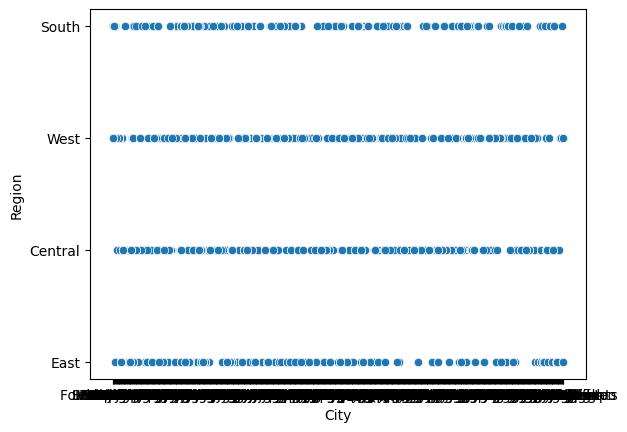

In [ ]:
 #Menampilkan scatterplot untuk city dan Region

sns.scatterplot(data=df2, x="City", y="Region")

####Visualisasi Composition

In [ ]:
# Menampilkan pieplot untuk sub category
px.pie(df2,names=("Sub-Category"))

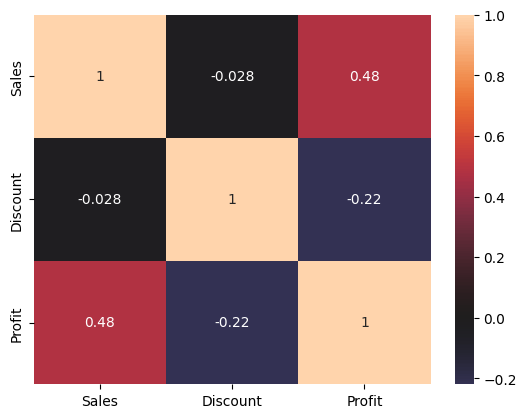

In [ ]:
# Menampilkan visualisasi heatmap untuk Setiap variabel numerik yang ada
sns.heatmap(
    df2[['Sales', 'Discount','Profit']].corr(),
    annot=True,
    center=0,
);

#Data Preparation


####Cleaning Data


In [ ]:
#Cleaning data
df2.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

####Transform Data


 proses konversi data ke dalam skala baru 

In [ ]:
#proses konversi data 
df_transformed = pd.get_dummies(df2, columns = ['Category', 'Country','Segment'])
df_transformed
     

,Ship Mode,City,State,Postal Code,Region,Sub-Category,Sales,Quantity,Discount,Profit,Category_Furniture,Category_Office Supplies,Category_Technology,Country_United States,Segment_Consumer,Segment_Corporate,Segment_Home Office
0,Second Class,Henderson,Kentucky,42420,South,Bookcases,261.9600,2,0.00,41.9136,1,0,0,1,1,0,0
1,Second Class,Henderson,Kentucky,42420,South,Chairs,731.9400,3,0.00,219.5820,1,0,0,1,1,0,0
2,Second Class,Los Angeles,California,90036,West,Labels,14.6200,2,0.00,6.8714,0,1,0,1,0,1,0
3,Standard Class,Fort Lauderdale,Florida,33311,South,Tables,957.5775,5,0.45,-383.0310,1,0,0,1,1,0,0
4,Standard Class,Fort Lauderdale,Florida,33311,South,Storage,22.3680,2,0.20,2.5164,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Miami,Florida,33180,South,Furnishings,25.2480,3,0.20,4.1028,1,0,0,1,1,0,0
9990,Standard Class,Costa Mesa,California,92627,West,Furnishings,91.9600,2,0.00,15.6332,1,0,0,1,1,0,0
9991,Standard Class,Costa Mesa,California,92627,West,Phones,258.5760,2,0.20,19.3932,0,0,1,1,1,0,0
9992,Standard Class,Costa Mesa,California,92627,West,Paper,29.6000,4,0.00,13.3200,0,1,0,1,1,0,0


####Split Data

pemisahan data adalah metode membagi data menjadi dua bagian atau lebih yang membentuk subhimpunan data.

In [ ]:
from sklearn.model_selection import train_test_split
x = df2.drop('City',axis=1)
y = df2['City']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train)

           Ship Mode      Segment        Country        State  Postal Code  \
3428    Second Class  Home Office  United States         Ohio        43130   
3538        Same Day    Corporate  United States     Kentucky        42420   
409   Standard Class     Consumer  United States   California        94110   
4883  Standard Class     Consumer  United States   California        92804   
3846     First Class    Corporate  United States   California        90049   
...              ...          ...            ...          ...          ...   
5734     First Class    Corporate  United States  Connecticut         6460   
5191  Standard Class     Consumer  United States   California        94122   
5390    Second Class    Corporate  United States   Washington        98105   
860   Standard Class     Consumer  United States   California        94122   
7270  Standard Class    Corporate  United States   California        95123   

     Region         Category Sub-Category    Sales  Quantity  D

In [ ]:
# Encoding
# Merubah tipe data string/kategori menjadi numerik
df4 = pd.get_dummies(df2)
df2

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [ ]:
df4

,Postal Code,Sales,Quantity,Discount,Profit,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,42420,261.9600,2,0.00,41.9136,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,42420,731.9400,3,0.00,219.5820,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,90036,14.6200,2,0.00,6.8714,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,33311,957.5775,5,0.45,-383.0310,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,33311,22.3680,2,0.20,2.5164,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,33180,25.2480,3,0.20,4.1028,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
9990,92627,91.9600,2,0.00,15.6332,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
9991,92627,258.5760,2,0.20,19.3932,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
9992,92627,29.6000,4,0.00,13.3200,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# TARGET = df4.output  #kolom penentu
# data = df4.drop(columns=["output"]) #tabel tidak ada penentu